##### <h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO T780: Applied Machine Learning</h2>
<h3 style = "text-align:center">GROUP 6: PROJECT TITLE : PASSENGER SURVIVAL PREDICTION ON TITANIC DATASET </h3>
<h4> </h4>


#### GROUP MEMEBERS:

Tej Gottapu (tg672@drexel.edu)
Dhilipan Dushendran(dd3255@drexel.edu)

### Import Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
sns.set()
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.exceptions import NotFittedError
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from IPython.display import display
# Common imports
import numpy as np
import pandas as pd
# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import missingno as msno 
# to make this notebook's output identical at every run
np.random.seed(42)
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier

### Read Data 

In [19]:

train_data = pd.read_csv('C:/Users/HP/Documents/CCI LAPTOP FRESH/SUMMER QUARTER/INFO-T780-002 Applied Machine Learning/PROJECT PROPOSAL/TITANIC/train.csv')

test_data = pd.read_csv('C:/Users/HP/Documents/CCI LAPTOP FRESH/SUMMER QUARTER/INFO-T780-002 Applied Machine Learning/PROJECT PROPOSAL/TITANIC/test.csv')

In [20]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### EXPLORATORY DATA ANALYSIS AND PRE-PROCESSING

#### Attributes in the dataset:

There are 12 columns in the training data.

PassengerId : It indicates the Passenger id

Survived' :  "It is '0' or '1'. It indicates whether the passenger has survived or not.
            if it's a ""1"", the passenger survived.
            if it's a ""0"", the passenger died."

Pclass' 	There are three classes 1,2,3 (can be considered as Economy,Business and First)

Name' : Passenger Name

Sex' : Passenger gender

Age' : Passenger age

SibSp' : "Sibling and Spouse

Sibling = *brother, sister, stepbrother, stepsister* **
Spouse =* husband, wife * **"


parch: Number of Parents/Children Aboard

ticket : Ticket Number

fare : Passenger Fare

cabin : Cabin

embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

 
The testing data has all the columns similar to the training data except the 'Survived' column which is present exclusively in the training data. We would predict the survival rate on the testing data based upon the training data.



##### CATEGORICAL FEATURES:
Survived, Sex, and Embarked. Ordinal: Pclass.

##### CONTINUOUS FEATURES:
AGE,FARE,Discrete: SibSp, Parch.

#### Attributes in the dataset:

There are 12 columns in the training data.

PassengerId : It indicates the Passenger id

Survived' :  "It is '0' or '1'. It indicates whether the passenger has survived or not.
            if it's a ""1"", the passenger survived.
            if it's a ""0"", the passenger died."

Pclass' 	There are three classes 1,2,3 (can be considered as Economy,Business and First)

Name' : Passenger Name

Sex' : Passenger gender

Age' : Passenger age

SibSp' : "Sibling and Spouse

Sibling = *brother, sister, stepbrother, stepsister* **
Spouse =* husband, wife * **"


parch: Number of Parents/Children Aboard

ticket : Ticket Number

fare : Passenger Fare

cabin : Cabin

embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

 
The testing data has all the columns similar to the training data except the 'Survived' column which is present exclusively in the training data. We would predict the survival rate on the testing data based upon the training data.



##### CATEGORICAL FEATURES:
Survived, Sex, and Embarked. Ordinal: Pclass.

##### CONTINUOUS FEATURES:
AGE,FARE,Discrete: SibSp, Parch.

#### Percentage of survivors

In [25]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [26]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


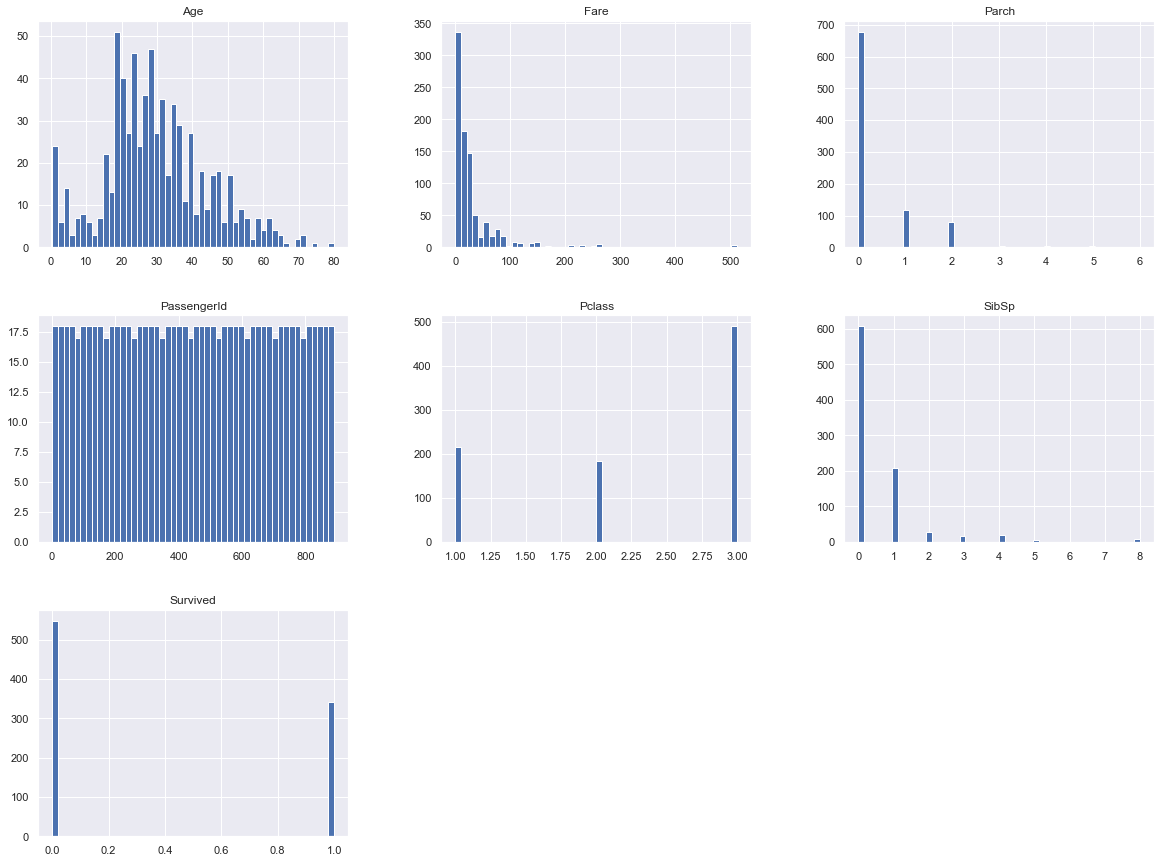

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.show()

##### VISUALIZATION/PLOT FOR THE NUMBER OF SURVIVORS:

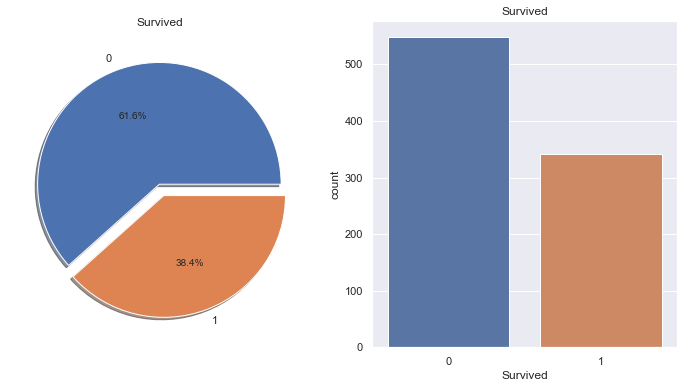

In [28]:
f,ax=plt.subplots(1,2,figsize=(12,6))
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Based on the above plots we can infer that many passengers had died (61.6%) and out of 891 passengers in training set, only around 350 people survived.

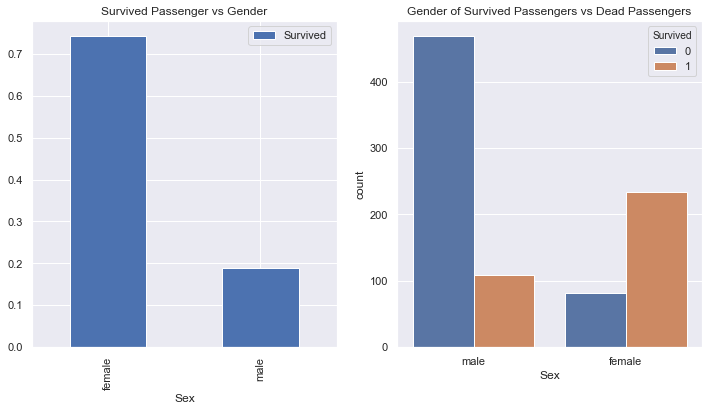

In [29]:
f,ax=plt.subplots(1,2,figsize=(12,6))
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived Passenger vs Gender')
sns.countplot('Sex',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Gender of Survived Passengers vs Dead Passengers')
plt.show()

Based on the above figure , we see that the number of men on the ship is greater than the number of women whereas most of survivors are women and it is nearly twice the number of males passengers survived. The survival rate is a very important feature and would be helpful in prediction.

##### PASSENGER CLASS AND SURVIVORS

In [30]:
pd.crosstab(train_data.Pclass,train_data.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

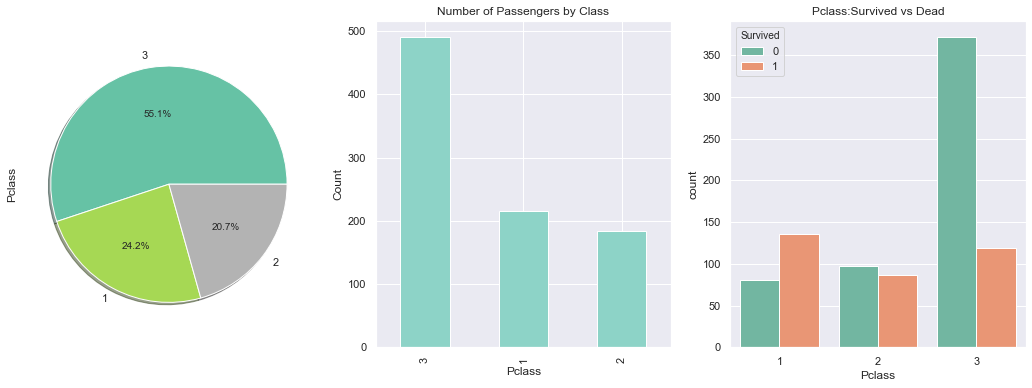

In [31]:
f,ax = plt.subplots(1,3, figsize=(18,6))
train_data['Pclass'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set2')
train_data['Pclass'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('Number of Passengers by Class')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Pclass')
sns.countplot('Pclass', hue='Survived',data= train_data, ax=ax[2], palette='Set2')
ax[2].set_title('Pclass:Survived vs Dead')

From the above plots, we can infer that passenegers belonging Pclass 1 have more chances of survival. In addition to it we also see that though the number of Passengers in Pclass 3 were much higher than Pclass 1 and Pclass 2, but still the survival rate of passengers from pclass 3 is very low. 

##### Passenger survival rate with Sex and Pclass

In [32]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

##### FREQUENCY OF SURVIVORS VS NON-SURVIVORS

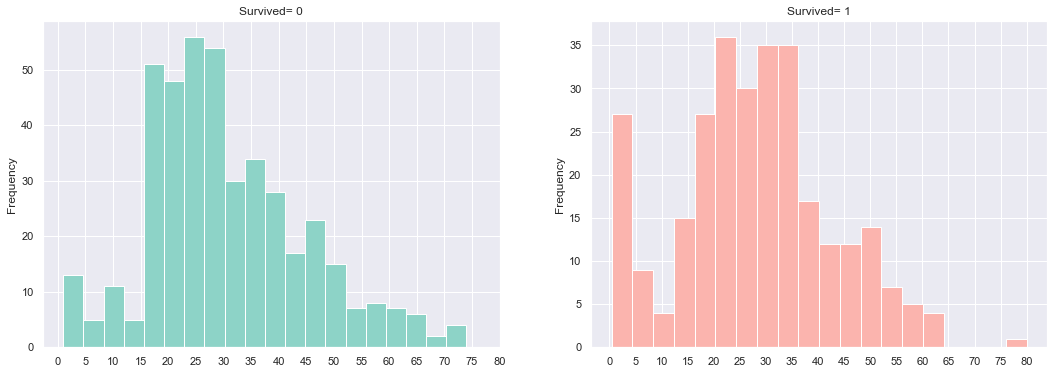

In [33]:
f,ax=plt.subplots(1,2,figsize=(18,6))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,cmap='Set3')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20, cmap='Pastel1')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)


plt.show()

Passengers in age category (5 years) and middle aged (20 to 35) had the maximum number of survivors when comapred to other age groups.

##### EMBARKED LOCATIONS VS PASSENGERS VS SURVIVORS

In [34]:
pd.crosstab([train_data.Embarked, train_data.Pclass],[train_data.Sex,train_data.Survived], margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

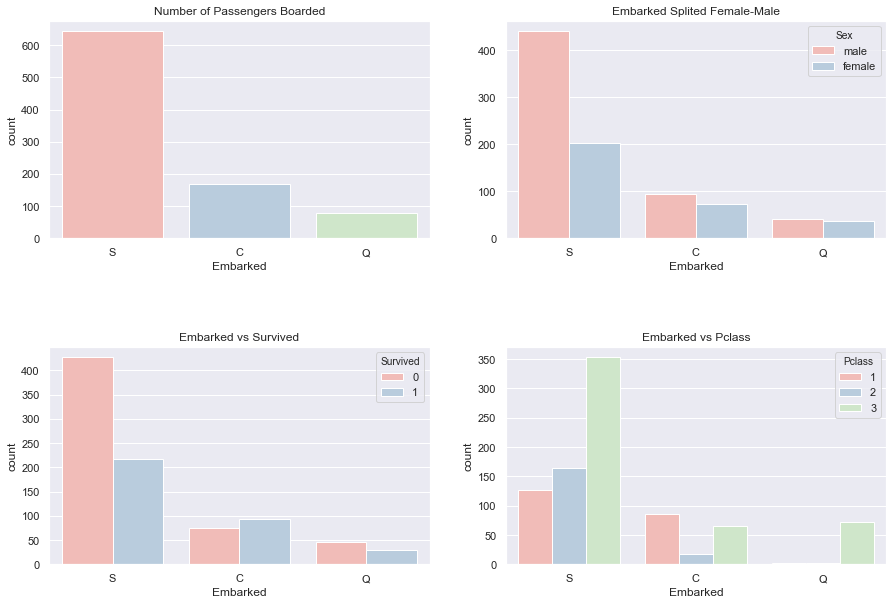

In [35]:
f, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot('Embarked', data= train_data, ax= ax[0,0], palette='Pastel1')
ax[0,0].set_title('Number of Passengers Boarded')
sns.countplot('Embarked', hue='Sex',data= train_data, ax= ax[0,1], palette='Pastel1')
ax[0,1].set_title('Embarked Splited Female-Male')
sns.countplot('Embarked',hue='Survived', data= train_data, ax= ax[1,0], palette='Pastel1')
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass',data= train_data, ax= ax[1,1], palette='Pastel1')
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Correlation

In [36]:
corr_matrix = train_data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

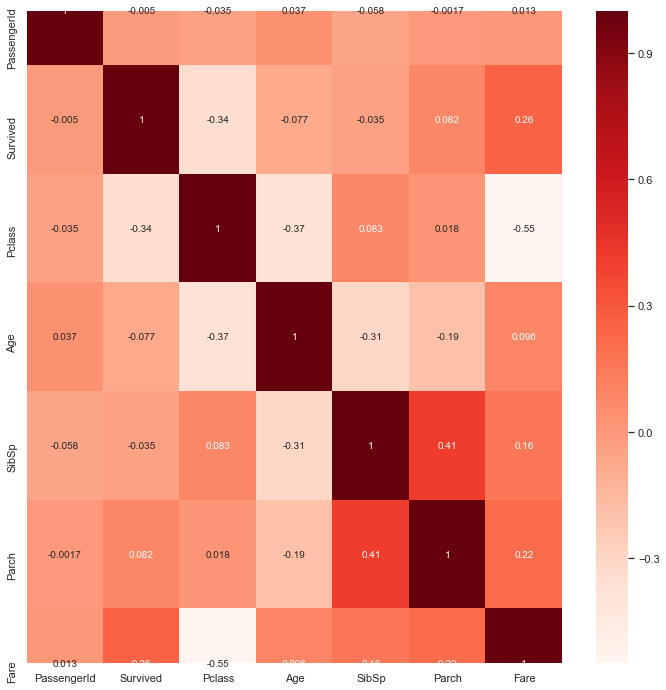

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)

plt.show()

### PRE-PROCESSING

#### MISSING VALUES :

The following columns have missing values

Age            177
Cabin          687
Embarked         2


In [38]:
##To find the missing data

def missing_data_table(df):
    actual_value = df.isnull().sum().sort_values(ascending=False)
    percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data_from_input = pd.concat([actual_value, percentage], axis=1, keys=['Total', 'Percentage'])
    return missing_data_from_input

In [39]:
missing_data_table(train_data)

,Total,Percentage
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


As per the above results, we have missing values in 3 columns such as Cabin, Age and Embarked. And the amount of data missing from Cabin column is so large that it can not be altered or removed as the total data is less, whereas Age has 177 missing values which can be filled with the mean of the corresponding passenger category.

Finally, the column embarked has only 2 missing values. This column represents the point of boarding , with the help of below plot we can come to a reasonable conclusion that the value "C" has higher fare and the fare of missing value is also on the high range(i.e. Fare = 80).


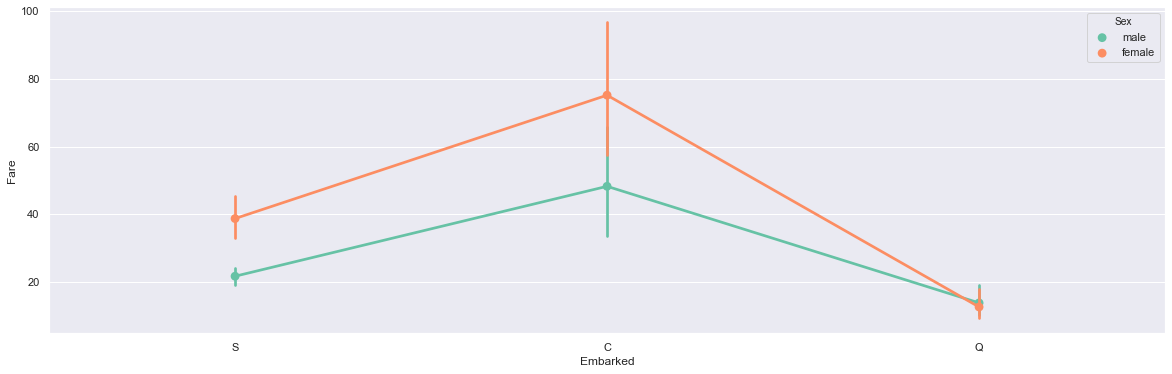

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [40]:
##Plot to find the distribution of fare & embarked.

figure, axes = plt.subplots(1,1,figsize=(20, 6))
plot = sns.catplot(x="Embarked", y="Fare", hue="Sex", data=train_data, palette=('Set2'), kind="point", ax=axes)
plt.close(plot.fig)
plt.show()
display(train_data[train_data['Embarked'].isnull()])

In [41]:
def preprocess_data(df):
    
    processed_data = df
    
    
    ##to fill the missing values of embarked column as seen above
    processed_data['Embarked'].fillna('C', inplace=True)
    
    ##to fill the missing values of Age by calculating mean
    processed_data['Age'] = processed_data.groupby(['Pclass','Sex','Parch','SibSp'])['Age'].transform(lambda x: x.fillna(x.mean()))
    processed_data['Age'] = processed_data.groupby(['Pclass','Sex','Parch'])['Age'].transform(lambda x: x.fillna(x.mean()))
    processed_data['Age'] = processed_data.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
    
    ## using interpolate function to take care of the missing values in fare column and Cabin colum
    processed_data['Fare'] = processed_data['Fare'].interpolate()
    processed_data['Cabin'].fillna('U', inplace=True)

    ##to create new column name Title from name column
    processed_data['Title'] = pd.Series((name.split('.')[0].split(',')[1].strip() for name in train_data['Name']), index=train_data.index)
    processed_data['Title'] = processed_data['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    processed_data['Title'] = processed_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
    processed_data['Title'] = processed_data['Title'].replace('Mme', 'Mrs')
    processed_data['Title'] = processed_data['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    
     ##to fill the missing values of Age by calculating mean using column Title with same values
    processed_data['Age'] = processed_data.groupby(['Title'])['Age'].transform(lambda x: x.fillna(x.mean()))
    
    ##changing categorical value to numerical value
    processed_data['Sex'] = processed_data['Sex'].map({'male': 0, 'female': 1})
    processed_data['Embarked'] = processed_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    
    # creating size of the travel group based upon SibSp and Parch
    processed_data['FamillySize'] = processed_data['SibSp'] + processed_data['Parch'] + 1
    processed_data['FamillySize'][processed_data['FamillySize'].between(1, 5, inclusive=False)] = 2
    processed_data['FamillySize'][processed_data['FamillySize']>5] = 3
    processed_data['IsAlone'] = np.where(processed_data['FamillySize']!=1, 0, 1)
    processed_data['IsChild'] = processed_data['Age'] < 18
    processed_data['IsChild'] = processed_data['IsChild'].astype(int)
    
    ##strip the Cabin column to get only the first letter
    processed_data['Cabin'] = processed_data['Cabin'].str[:1]
    processed_data['Cabin'] = processed_data['Cabin'].map({cabin: p for p, cabin in enumerate(set(cab for cab in processed_data['Cabin']))})
    
    ##this new column is to set as 1 or 0 if an other passenger with same ticket is survived
    processed_data['TicketSurvivor'] = pd.Series(0, index=processed_data.index)
    tickets = processed_data['Ticket'].value_counts().to_dict()
    for t, occ in tickets.items():
        if occ != 1:
            table = train_data['Survived'][train_data['Ticket'] == t]
            if sum(table) != 0:
                processed_data['TicketSurvivor'][processed_data['Ticket'] == t] = 1
    

    processed_data = processed_data.drop(['Name', 'Ticket', 'PassengerId'], 1)    
    
    return processed_data

In [42]:
##dividing train test data
train_data_dataframe = train_data.copy()
X = train_data_dataframe.drop(['Survived'], 1)
Y = train_data_dataframe['Survived']



In [43]:
X = preprocess_data(X)

In [44]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked  Title  \
0         3    0  22.000000      1      0   7.2500      2         0      1   
1         1    1  38.000000      1      0  71.2833      1         1      3   
2         3    1  26.000000      0      0   7.9250      2         0      2   
3         1    1  35.000000      1      0  53.1000      1         0      3   
4         3    0  35.000000      0      0   8.0500      2         0      1   
..      ...  ...        ...    ...    ...      ...    ...       ...    ...   
886       2    0  27.000000      0      0  13.0000      2         0      5   
887       1    1  19.000000      0      0  30.0000      5         0      2   
888       3    1  14.346939      1      2  23.4500      2         0      2   
889       1    0  26.000000      0      0  30.0000      1         1      1   
890       3    0  32.000000      0      0   7.7500      2         2      1   

     FamillySize  IsAlone  IsChild  TicketSurvivor  
0         

In [45]:
# X = preprocess_data(X)
scale = StandardScaler()
X = pd.DataFrame(scale.fit_transform(X.values), index=X.index, columns=X.columns)
    
# Split dataset for model testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamillySize,IsAlone,IsChild,TicketSurvivor
331,-1.566107,-0.737695,1.181540,-0.474545,-0.473674,-0.074583,-1.093803,-0.571933,-0.707550,-0.670389,0.811922,-0.405840,-0.596795
733,-0.369365,-0.737695,-0.483367,-0.474545,-0.473674,-0.386671,-0.307218,-0.571933,-0.707550,-0.670389,0.811922,-0.405840,-0.596795
382,0.827377,-0.737695,0.182596,-0.474545,-0.473674,-0.488854,-0.307218,-0.571933,-0.707550,-0.670389,0.811922,-0.405840,-0.596795
704,0.827377,-0.737695,-0.261380,0.432793,-0.473674,-0.490280,-0.307218,-0.571933,-0.707550,0.668886,-1.231645,-0.405840,-0.596795
813,0.827377,1.355574,-1.741297,3.154809,2.008933,-0.018709,-0.307218,-0.571933,0.263832,2.008162,-1.231645,2.464027,-0.596795


In [46]:
# Split dataset for model testing
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# X_train.head()

Now that we are done with the preprocessing and split of the train data set to train our model, we can proceed to try different models. Here we are going to use the confusion matrix to display the results of the model so that it will be easy to understand and compare.

In [47]:
def display_confusion_matrix(target, prediction, score=None):
    cm = metrics.confusion_matrix(target, prediction)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    if score:
        score_title = 'Accuracy Score: {0}'.format(round(score, 5))
        plt.title(score_title, size = 14)
    classification_report = pd.DataFrame.from_dict(metrics.classification_report(target, prediction, output_dict=True), orient='index')
    display(classification_report.round(2))

### MODELS:

The following machine learning models have been used :

1)Logistic Regression : 

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression[1] (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).( source : Wikipedia)

2)Decision Tree:

Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. (source : Wikipedia)

Here , we use DECISION TREE CLASSIFIER


3)Support Vector Machine (SVC):

In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.(source : Wikipedia)

4) Random Forest Classifier:

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.(source : Wikipedia)

5) Artificial Neural Network:

Artificial neural networks (ANNs), usually simply called neural networks (NNs), are computing systems vaguely inspired by the biological neural networks that constitute animal brains.An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron that receives a signal then processes it and can signal neurons connected to it.(source : Wikipedia)



#### Logistic Regression

Accuracy score of logistic regression model is : 0.8212290502793296
Precision score of logistic regression model is : 0.8088235294117647
Recall score of logistic regression model is : 0.7432432432432432
F1 score of logistic regression model is : 0.7746478873239436
MSE_Logistic_regression: 0.1788
RMSE_Logistic_regression: 0.4228
MAE_Logistic_regression: 0.1788


Confusion matrix of logistic regression is : [[92 13]
 [19 55]]


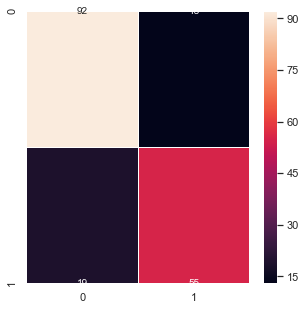

In [48]:

lg = LogisticRegression(solver='lbfgs', random_state=42)
lg.fit(X_train, Y_train)


logistic_prediction = lg.predict(X_test)


accuracy_score_logistic = metrics.accuracy_score(Y_test, logistic_prediction)
precision_score_logistic = precision_score(Y_test, logistic_prediction)
recall_score_logistic = recall_score(Y_test, logistic_prediction)
f1_score_logistic = f1_score(Y_test, logistic_prediction)
# display_confusion_matrix(Y_test, logistic_prediction, score=score)

print("Accuracy score of logistic regression model is :",accuracy_score_logistic)
print("Precision score of logistic regression model is :",precision_score_logistic)
print("Recall score of logistic regression model is :",recall_score_logistic)
print("F1 score of logistic regression model is :",f1_score_logistic)

fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches

mse_logistic_regression =mean_squared_error(Y_test, logistic_prediction)
rmse_log_reg =np.sqrt(mse_logistic_regression)

lin_mae = mean_absolute_error(Y_test, logistic_prediction)


print("MSE_Logistic_regression: %.4f" % mse_logistic_regression)
print("RMSE_Logistic_regression: %.4f" % rmse_log_reg)
print("MAE_Logistic_regression: %.4f" % lin_mae)

confusion_matrix_logistic_regression = confusion_matrix(Y_test, logistic_prediction)

print("\n")
print("Confusion matrix of logistic regression is :",confusion_matrix_logistic_regression)
# sns.heatmap(confusion_matrix_logistic_regression,fmt=".3f", linewidths=.5, square=True)

sns.heatmap(confusion_matrix_logistic_regression, annot=True, linewidths=.5, ax=ax)
plt.show()

# plot_confusion_matrix(lg, Y_test, logistic_prediction)
# plt.show()

#### Decision Tree

Accuracy score of Decision Tree model is : 0.8491620111731844
Precision score of Decision Tree model is : 0.8051948051948052
Recall score of Decision Tree model is : 0.8378378378378378
F1 score of Decision Tree model is : 0.8211920529801325
decision_tree_MSE: 0.1508
decision_tree_RMSE: 0.3884
decision_tree_MAE: 0.1508


Confusion matrix of Decision_Tree is : [[90 15]
 [12 62]]


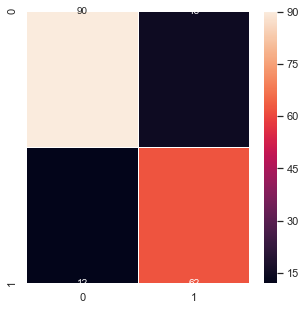

In [49]:
dt = DecisionTreeClassifier(min_samples_split=15, min_samples_leaf=20, random_state=42)
dt.fit(X_train, Y_train)
dt_prediction = dt.predict(X_test)

# score = metrics.accuracy_score(Y_test, dt_prediction)
# display_confusion_matrix(Y_test, dt_prediction, score=score)

accuracy_score_decision = metrics.accuracy_score(Y_test, dt_prediction)
precision_score_decision = precision_score(Y_test, dt_prediction)
recall_score_decision = recall_score(Y_test, dt_prediction)
f1_score_decision = f1_score(Y_test, dt_prediction)

print("Accuracy score of Decision Tree model is :",accuracy_score_decision)
print("Precision score of Decision Tree model is :",precision_score_decision)
print("Recall score of Decision Tree model is :",recall_score_decision)
print("F1 score of Decision Tree model is :",f1_score_decision)


decision_tree_mse =mean_squared_error(Y_test, dt_prediction)
decision_tree_rmse=np.sqrt(decision_tree_mse)
decision_tree_lin_mae = mean_absolute_error(Y_test, dt_prediction)

print("decision_tree_MSE: %.4f" % decision_tree_mse)
print("decision_tree_RMSE: %.4f" % decision_tree_rmse)
print("decision_tree_MAE: %.4f" % decision_tree_lin_mae)

print("\n")

fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
confusion_matrix_Decision_Tree = confusion_matrix(Y_test, dt_prediction)

print("Confusion matrix of Decision_Tree is :",confusion_matrix_Decision_Tree)
# sns.heatmap(confusion_matrix_logistic_regression,fmt=".3f", linewidths=.5, square=True)
sns.heatmap(confusion_matrix_Decision_Tree, annot=True, linewidths=.5, ax=ax)
plt.show()

#### Support Vector Machine

Accuracy score of SVM model is : 0.8491620111731844
Precision score of SVM model is : 0.873015873015873
Recall score of SVM model is : 0.7432432432432432
F1 score of SVM model is : 0.8029197080291971
SVM_MSE: 0.1508
SVM_rmse: 0.3884
SVM_mae: 0.1508


Confusion matrix of SVM is : [[97  8]
 [19 55]]


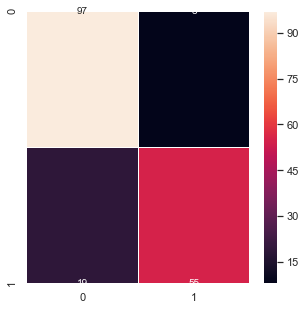

In [50]:
svm = SVC(gamma='auto', random_state=42,probability=True)
svm.fit(X_train, Y_train)
svm_prediction = svm.predict(X_test)

# score = metrics.accuracy_score(Y_test, svm_prediction)
# display_confusion_matrix(Y_test, svm_prediction, score=score)

accuracy_score_svm = metrics.accuracy_score(Y_test, svm_prediction)
precision_score_svm = precision_score(Y_test, svm_prediction)
recall_score_svm = recall_score(Y_test, svm_prediction)
f1_score_svm = f1_score(Y_test, svm_prediction)

print("Accuracy score of SVM model is :", accuracy_score_svm)
print("Precision score of SVM model is :",precision_score_svm)
print("Recall score of SVM model is :",recall_score_svm)
print("F1 score of SVM model is :",f1_score_svm)
SVM_mse =mean_squared_error(Y_test, svm_prediction)
SVM_rmse =np.sqrt(SVM_mse)
SVM_mae = mean_absolute_error(Y_test, svm_prediction)

print("SVM_MSE: %.4f" % SVM_mse)
print("SVM_rmse: %.4f" % SVM_rmse)
print("SVM_mae: %.4f" % SVM_mae)
print("\n")
fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
confusion_matrix_SVM = confusion_matrix(Y_test, svm_prediction)

print("Confusion matrix of SVM is :",confusion_matrix_SVM)
# sns.heatmap(confusion_matrix_logistic_regression,fmt=".3f", linewidths=.5, square=True)
sns.heatmap(confusion_matrix_SVM, annot=True, linewidths=.5, ax=ax)
plt.show()

#### Random Forest

Accuracy score of Random Forest model is : 0.8603351955307262
Precision score of Random Forest model is : 0.8450704225352113
Recall score of Random Forest model is : 0.8108108108108109
F1 score of Random Forest model is : 0.8275862068965518
RF_MSE: 0.1397
RF_rmse: 0.3884
RF_mae: 0.1397


Confusion matrix of Random Forest is : [[94 11]
 [14 60]]


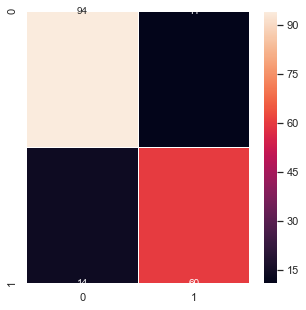

In [51]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, Y_train)
rf_prediction = rf.predict(X_test)

# score = metrics.accuracy_score(Y_test, rf_prediction)
# display_confusion_matrix(Y_test, rf_prediction, score=score)


accuracy_score_rf = metrics.accuracy_score(Y_test, rf_prediction)
precision_score_rf = precision_score(Y_test, rf_prediction)
recall_score_rf = recall_score(Y_test, rf_prediction)
f1_score_rf = f1_score(Y_test, rf_prediction)


print("Accuracy score of Random Forest model is :",accuracy_score_rf)
print("Precision score of Random Forest model is :",precision_score_rf)
print("Recall score of Random Forest model is :",recall_score_rf)
print("F1 score of Random Forest model is :",f1_score_rf)


RF_mse =mean_squared_error(Y_test, rf_prediction)
RF_rmse =np.sqrt(SVM_mse)
RF_mae = mean_absolute_error(Y_test, rf_prediction)

print("RF_MSE: %.4f" % RF_mse)
print("RF_rmse: %.4f" % RF_rmse)
print("RF_mae: %.4f" % RF_mae)

print("\n")


fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
confusion_matrix_rf = confusion_matrix(Y_test, rf_prediction)

print("Confusion matrix of Random Forest is :",confusion_matrix_rf)
# sns.heatmap(confusion_matrix_logistic_regression,fmt=".3f", linewidths=.5, square=True)
sns.heatmap(confusion_matrix_rf, annot=True, linewidths=.5, ax=ax)
plt.show()


### Neural Network:

In [52]:
def build_ann(optimizer='adam'):
    
    ann = Sequential()
    
    # input layer
    ann.add(Dense(units=32, kernel_initializer='glorot_uniform', activation='relu', input_shape=(13,)))
    
    # hidden layer
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    
    # output layer
    ann.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
    # Compile the model
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return ann

In [53]:
opt = optimizers.Adam(lr=0.001)
ann = build_ann(opt)
# Training the ANN
history = ann.fit(X_train, Y_train, batch_size=16, epochs=30, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 712 samples, validate on 179 samples
Epoch 1/30
712/712 [==============================] - 1s 745us/step - loss: 0.6483 - accuracy: 0.6334 - val_loss: 0.5339 - val_accuracy: 0.7430
Epoch 2/30
712/712 [==============================] - 0s 112us/step - loss: 0.5540 - accuracy: 0.7219 - val_loss: 0.4494 - val_accuracy: 0.7765
Epoch 3/30
712/712 [==============================] - 0s 132us/step - loss: 0.4795 - accuracy: 0.8006 - val_loss: 0.4123 - val_accuracy: 0.7877
Epoch 4/30
712/712 [==============================] - 0s 125us/step - loss: 0.4391 - accuracy: 0.8258 - val_loss: 0.3909 - val_accuracy: 0.8101
Epoch 5/30
712/712 [==============================] - 0s 93us/step - loss: 0.4223 - accuracy: 0.8216 - val_loss: 0.3823 - val_accuracy: 0.8156
Epoch 6/30
712/712 [==============================] - 0s 108us/step - loss: 0.4306 - accuracy: 0.8272 - val_loss: 0.3726 - val_accuracy: 0.8

Accuracy score of Artificial Neural Network is : 0.8379888268156425
Precision score of Artificial Neural Network is : 0.8688524590163934
Recall score of Artificial Neural Network is : 0.7162162162162162
F1 score of Artificial Neural Network is : 0.7851851851851852
Artificial Neural Network_MSE: 0.1620
Artificial Neural Network_RMSE: 0.4025
Artificial Neural Network_MAE: 0.1620


Confusion matrix of Artificial Neural Network is : [[97  8]
 [21 53]]


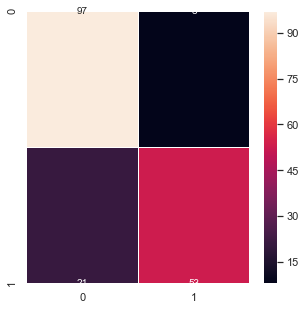

In [54]:
# Predicting the Test set results
ann_prediction = ann.predict(X_test)
ann_prediction = (ann_prediction > 0.5) # convert probabilities to binary output

accuracy_score_ann = metrics.accuracy_score(Y_test, ann_prediction)
precision_score_ann = precision_score(Y_test, ann_prediction)
recall_score_ann = recall_score(Y_test, ann_prediction)
f1_score_ann = f1_score(Y_test, ann_prediction)

print("Accuracy score of Artificial Neural Network is :",accuracy_score_ann)
print("Precision score of Artificial Neural Network is :",precision_score_ann)
print("Recall score of Artificial Neural Network is :",recall_score_ann)
print("F1 score of Artificial Neural Network is :",f1_score_ann)


ann_mse =mean_squared_error(Y_test, ann_prediction)
ann_rmse=np.sqrt(ann_mse)
ann_lin_mae = mean_absolute_error(Y_test, ann_prediction)

print("Artificial Neural Network_MSE: %.4f" % ann_mse)
print("Artificial Neural Network_RMSE: %.4f" % ann_rmse)
print("Artificial Neural Network_MAE: %.4f" % ann_lin_mae)

print("\n")

fig, ax = plt.subplots(figsize=(5,5)) 
confusion_matrix_Ann = confusion_matrix(Y_test, ann_prediction)

print("Confusion matrix of Artificial Neural Network is :",confusion_matrix_Ann)
sns.heatmap(confusion_matrix_Ann, annot=True, linewidths=.5, ax=ax)
plt.show()

### Using Ensemble method

In [55]:
class EsemblingClassifier:
    
    def __init__(self, verbose=True):
        self.ann = build_ann(optimizer=optimizers.Adam(lr=0.001))
        self.rf = RandomForestClassifier(n_estimators=300, max_depth=11, random_state=42)
        self.svm = SVC(random_state=42)
        self.trained = False
        self.verbose = verbose
        
    def fit(self, X, y):
        if self.verbose:
            print('Fitting models')
        self.ann.fit(X, y, epochs=30, batch_size=16, verbose=0)
        self.rf.fit(X, y)
        self.svm.fit(X, y)
        self.trained = True
    
    def predict(self, X):
        if self.trained == False:
            raise NotFittedError('Please train the classifier before making a prediction')
        if self.verbose:
            print('Making and combining predictions')
        predictions = list()
        pred_ann = self.ann.predict(X)
        pred_ann = (pred_ann > 0.5)*1
        pred_rf = self.rf.predict(X)
        pred_svm = self.svm.predict(X)
        for n in range(len(pred_ann)):
            combined = pred_ann[n] + pred_rf[n] + pred_svm[n]
            p = 0 if combined == 1 or combined == 0 else 1
            predictions.append(p)
        return predictions

Fitting models
Making and combining predictions
Accuracy score of Ensembling Classifier model is : 0.8491620111731844
Precision score of Ensembling Classifier model is : 0.8051948051948052
Recall score of Ensembling Classifier model is : 0.8378378378378378
F1 score of Ensembling Classifier model is : 0.8211920529801325
ens_MSE: 0.1508
ens_RMSE: 0.3884
ens_MAE: 0.1508


Confusion matrix of Ensembling Classifier model is : [[90 15]
 [12 62]]


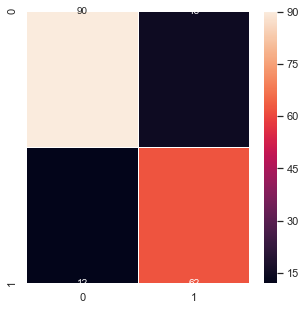

In [56]:
ens = EsemblingClassifier()
ens.fit(X_train, Y_train)
ens_prediction = ens.predict(X_test)

accuracy_score_decision = metrics.accuracy_score(Y_test, dt_prediction)
precision_score_decision = precision_score(Y_test, dt_prediction)
recall_score_decision = recall_score(Y_test, dt_prediction)
f1_score_decision = f1_score(Y_test, dt_prediction)

print("Accuracy score of Ensembling Classifier model is :",accuracy_score_decision)
print("Precision score of Ensembling Classifier model is :",precision_score_decision)
print("Recall score of Ensembling Classifier model is :",recall_score_decision)
print("F1 score of Ensembling Classifier model is :",f1_score_decision)


ens_mse =mean_squared_error(Y_test, dt_prediction)
ens_rmse=np.sqrt(ens_mse)
ens_lin_mae = mean_absolute_error(Y_test, dt_prediction)

print("ens_MSE: %.4f" % ens_mse)
print("ens_RMSE: %.4f" % ens_rmse)
print("ens_MAE: %.4f" % ens_lin_mae)

print("\n")

fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
confusion_matrix_ens = confusion_matrix(Y_test, dt_prediction)

print("Confusion matrix of Ensembling Classifier model is :",confusion_matrix_ens)
# sns.heatmap(confusion_matrix_logistic_regression,fmt=".3f", linewidths=.5, square=True)
sns.heatmap(confusion_matrix_ens, annot=True, linewidths=.5, ax=ax)
plt.show()

In [95]:
## Aplying model on test data set

test = test_data.copy()
test = preprocess_data(test)
test = pd.DataFrame(scale.fit_transform(test.values), index=test.index, columns=test.columns)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamillySize,IsAlone,IsChild,TicketSurvivor
0,0.873482,-0.755929,0.376278,-0.499470,-0.400248,-0.497185,-0.257036,2.243165,-0.756787,-0.664957,0.807573,-0.347338,-0.3253
1,0.873482,1.322876,1.340981,0.616992,-0.400248,-0.512048,-0.257036,-0.677841,1.245346,0.731787,-1.238278,-0.347338,-0.3253
2,-0.315819,-0.755929,2.498625,-0.499470,-0.400248,-0.463874,-0.257036,2.243165,0.244279,-0.664957,0.807573,-0.347338,-0.3253
3,0.873482,-0.755929,-0.202543,-0.499470,-0.400248,-0.482248,-0.257036,-0.677841,1.245346,-0.664957,0.807573,-0.347338,-0.3253
4,0.873482,1.322876,-0.588425,0.616992,0.619896,-0.417269,-0.257036,-0.677841,-0.756787,0.731787,-1.238278,-0.347338,-0.3253


### AN OUTPUT FILE WILL BE CREATED WITH NAME 'Passernger_Survival_Predicted_Output'

In [96]:
# Create and train model on train data sample
model_test = EsemblingClassifier()
model_test.fit(X, Y)

# Predict for test data sample
prediction = model_test.predict(test)

predicted_output = test_data.copy()
predicted_output['Survived'] = prediction
predicted_output.to_csv('Passernger_Survival_Predicted_Output.csv', columns=['PassengerId', 'Survived'], index=False)

Fitting models
Making and combining predictions


### MODEL COMPARISON

In [57]:
# Python code demonstrate creating  
# pandas DataFrame with indexed by  
  
# DataFrame using arrays. 
import pandas as pd 
  
# initialise data of lists. 
data = {'Logistic Regression':[accuracy_score_logistic,precision_score_logistic,recall_score_logistic,f1_score_logistic],
        'Decision_Tree':[accuracy_score_decision,precision_score_decision,recall_score_decision,f1_score_decision],
        'SVM':[accuracy_score_svm,precision_score_svm,recall_score_svm,f1_score_svm],
        'RandomForest' :[accuracy_score_rf,precision_score_rf,recall_score_rf,f1_score_rf],
        'NeuralNetwork' :[accuracy_score_ann,precision_score_ann,recall_score_ann,f1_score_ann]
       
       
       } 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index = ['Accuracy','Precision','recall','F1_score']) 
  
# print the data 
df 

,Logistic Regression,Decision_Tree,SVM,RandomForest,NeuralNetwork
Accuracy,0.821229,0.849162,0.849162,0.860335,0.837989
Precision,0.808824,0.805195,0.873016,0.845070,0.868852
recall,0.743243,0.837838,0.743243,0.810811,0.716216
F1_score,0.774648,0.821192,0.802920,0.827586,0.785185


### Applying Voting Classifier on the above models

### Hard Voting

In [58]:
voting_clf_Hard = VotingClassifier(
    estimators=[('lr', lg), ('rf', rf), ('svc', svm),('dt',dt)],
    voting='hard')

In [59]:
voting_clf_Hard.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(min_samples_leaf=20,
                                                     min_samples_split=15,
                                                     random_state=42))])

In [60]:
from sklearn.metrics import accuracy_score

for clf in (lg, rf, svm, dt,voting_clf_Hard):
    clf.fit(X_train, Y_train)
    y_pred_hard = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred_hard))

LogisticRegression 0.8212290502793296
RandomForestClassifier 0.8603351955307262
SVC 0.8491620111731844
DecisionTreeClassifier 0.8491620111731844
VotingClassifier 0.8659217877094972


#### SOFT VOTING

In [61]:
voting_clf_Soft = VotingClassifier(
    estimators=[('lr', lg), ('rf', rf), ('svc', svm),('dt',dt)],
    voting='soft')

In [62]:
voting_clf_Soft.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(min_samples_leaf=20,
                                                     min_samples_split=15,
                                                     random_state=42))],
                 voting='soft')

In [63]:
from sklearn.metrics import accuracy_score

for clf_soft in (lg, rf, svm, dt,voting_clf_Soft):
    clf_soft.fit(X_train, Y_train)
    y_pred_Soft = clf_soft.predict(X_test)
    print(clf_soft.__class__.__name__, accuracy_score(Y_test, y_pred_Soft))

LogisticRegression 0.8212290502793296
RandomForestClassifier 0.8603351955307262
SVC 0.8491620111731844
DecisionTreeClassifier 0.8491620111731844
VotingClassifier 0.8603351955307262


#### ACCURACY VALUES : HARD VOTING

LogisticRegression 0.8268156424581006

RandomForestClassifier 0.8603351955307262

SVC 0.8547486033519553

DecisionTreeClassifier 0.8491620111731844

VotingClassifier 0.8659217877094972

#### ACCURACY VALUES : SOFT VOTING

LogisticRegression 0.8268156424581006

RandomForestClassifier 0.8603351955307262

SVC 0.8547486033519553

DecisionTreeClassifier 0.8491620111731844

VotingClassifier 0.8547486033519553

### USING HYPER PARAMETER TUNING

#### Logistic regression using Hyper parameter tuning

In [64]:
logistic = linear_model.LogisticRegression()

In [65]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [66]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [67]:
# Fit grid search
gs_logistic = clf.fit(X_train, Y_train)


In [68]:
# View best hyperparameters
print('Best Penalty:', gs_logistic.best_estimator_.get_params()['penalty'])
print('Best C:', gs_logistic.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 7.742636826811269


In [69]:
clf_best_logistic = LogisticRegression(penalty='l2',C=1)

In [70]:
clf_best_logistic.fit(X_train, Y_train)
hypertuned_logistic_pred =clf.predict(X_test)


In [71]:
confusion_matrix(Y_test,hypertuned_logistic_pred)
print('Hypertuned Logistic regression model Accuracy Score is : ' + str(metrics.accuracy_score(Y_test,hypertuned_logistic_pred)))
print('Hypertuned Logistic regression model Precision Score is : ' + str(precision_score(Y_test,hypertuned_logistic_pred)))
print('Hypertuned Logistic regression model Recall Score is: ' + str(recall_score(Y_test,hypertuned_logistic_pred)))
print('Hypertuned Logistic regression model F1 Score is : ' + str(f1_score(Y_test,hypertuned_logistic_pred)))

Hypertuned Logistic regression model Accuracy Score is : 0.8268156424581006
Hypertuned Logistic regression model Precision Score is : 0.8208955223880597
Hypertuned Logistic regression model Recall Score is: 0.7432432432432432
Hypertuned Logistic regression model F1 Score is : 0.7801418439716312


In [72]:
logistic_hypert_cv_scores = cross_val_score(clf_best_logistic,X_train,Y_train,
                                scoring="accuracy", cv=20)
print(logistic_hypert_cv_scores.mean())

0.8385714285714286


### Hyperparamater tuning on Decision Tree 

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv_Decision_Tree = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv_Decision_Tree.fit(X_train, Y_train)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    8.6s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [74]:
grid_search_cv_Decision_Tree.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=13, random_state=42)

In [75]:
grid_search_cv_Decision_Tree.best_params_

{'max_leaf_nodes': 13, 'min_samples_split': 2}

In [76]:
grid_search_cv_Decision_Tree.best_score_

0.8398929191929937

In [77]:
Hypertuned_Decision_Tree_Classifier = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=10, random_state=42)
Hypertuned_Decision_Tree_Classifier.fit(X_train, Y_train)
hypertuned_Dt_pred = Hypertuned_Decision_Tree_Classifier.predict(X_test)

confusion_matrix(Y_test,hypertuned_Dt_pred)
print('Hypertuned Decision Tree model Accuracy Score is : ' + str(metrics.accuracy_score(Y_test,hypertuned_Dt_pred)))
print('Hypertuned Decision Tree model Precision Score is : ' + str(precision_score(Y_test,hypertuned_Dt_pred)))
print('Hypertuned Decision Tree model Recall Score is: ' + str(recall_score(Y_test,hypertuned_Dt_pred)))
print('Hypertuned Decision Tree model F1 Score is : ' + str(f1_score(Y_test,hypertuned_Dt_pred)))


Hypertuned Decision Tree model Accuracy Score is : 0.8547486033519553
Hypertuned Decision Tree model Precision Score is : 0.8870967741935484
Hypertuned Decision Tree model Recall Score is: 0.7432432432432432
Hypertuned Decision Tree model F1 Score is : 0.8088235294117647


In [78]:
hypertuned_Dt_cv_scores = cross_val_score(Hypertuned_Decision_Tree_Classifier,X_train,Y_train,
                                scoring="accuracy", cv=20)
print(hypertuned_Dt_cv_scores.mean())

0.8355158730158729


### Hyperparameter Tuning : Support Vector Machine

In [79]:
SVM_model = SVC(max_iter=10000)

In [80]:
params = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
           'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

In [81]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state= 42)
Gs_svm = GridSearchCV(SVM_model, params, cv=cv, n_jobs=-1)
Gs_svm.fit(X_train, Y_train)


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=SVC(max_iter=10000), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [82]:
Gs_svm.best_params_

{'C': 1, 'kernel': 'rbf'}

In [83]:
Gs_svm.best_score_

0.8361242982369744

In [84]:
Hypertuned_SVM = sklearn.svm.SVC(C=1.0, kernel='rbf')

In [85]:
Hypertuned_SVM.fit(X_train, Y_train)
hypertuned_SVM_pred = Hypertuned_SVM.predict(X_test)

confusion_matrix(Y_test,hypertuned_SVM_pred)
print('Hypertuned SVM Accuracy Score is : ' + str(metrics.accuracy_score(Y_test,hypertuned_SVM_pred)))
print('Hypertuned SVM Precision Score is : ' + str(precision_score(Y_test,hypertuned_SVM_pred)))
print('Hypertuned SVM Recall Score is: ' + str(recall_score(Y_test,hypertuned_SVM_pred)))
print('Hypertuned SVM F1 Score is : ' + str(f1_score(Y_test,hypertuned_SVM_pred)))

Hypertuned SVM Accuracy Score is : 0.8491620111731844
Hypertuned SVM Precision Score is : 0.873015873015873
Hypertuned SVM Recall Score is: 0.7432432432432432
Hypertuned SVM F1 Score is : 0.8029197080291971


In [86]:
hypertuned_SVM_cv_scores = cross_val_score(Hypertuned_SVM,X_train,Y_train,
                                scoring="accuracy", cv=20)
print(hypertuned_SVM_cv_scores.mean())

0.8328968253968254


### Hyperparameter tuning on Random Forest Model

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [88]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 10}

In [89]:
grid_search.best_estimator_

RandomForestClassifier(max_features=4, n_estimators=10, random_state=42)

In [90]:
Hypertuned_Random_Forest = sklearn.ensemble.RandomForestClassifier(n_estimators=30,max_features=4,random_state=42)

In [91]:
Hypertuned_Random_Forest.fit(X_train, Y_train)
hypertuned_RF_pred = Hypertuned_Random_Forest.predict(X_test)

confusion_matrix(Y_test,hypertuned_RF_pred)
print('Hypertuned RF Accuracy Score is : ' + str(metrics.accuracy_score(Y_test,hypertuned_RF_pred)))
print('Hypertuned RF Precision Score is : ' + str(precision_score(Y_test,hypertuned_RF_pred)))
print('Hypertuned RF Recall Score is: ' + str(recall_score(Y_test,hypertuned_RF_pred)))
print('Hypertuned RF F1 Score is : ' + str(f1_score(Y_test,hypertuned_RF_pred)))

Hypertuned RF Accuracy Score is : 0.8659217877094972
Hypertuned RF Precision Score is : 0.8676470588235294
Hypertuned RF Recall Score is: 0.7972972972972973
Hypertuned RF F1 Score is : 0.8309859154929577


In [92]:
hypertuned_RF_cv_scores = cross_val_score(Hypertuned_Random_Forest,X_train,Y_train,
                                scoring="accuracy", cv=20)
print(hypertuned_RF_cv_scores.mean())

0.8177380952380954


### HYPERTUNED MODEL SCORES

##### LOGISTIC REGRESSION:
    
Accuracy Score is : 0.8268156424581006

Precision Score is : 0.8028169014084507
    
Recall Score is: 0.7702702702702703
    
F1 Score is : 0.7862068965517242

##### DECISION TREE

Accuracy Score is : 0.8770949720670391

Precision Score is : 0.8939393939393939

Recall Score is: 0.7972972972972973

F1 Score is : 0.8428571428571429

##### Random Forest Model

Accuracy Score is : 0.8491620111731844

Precision Score is : 0.8405797101449275

Recall Score is: 0.7837837837837838

F1 Score is : 0.8111888111888113

##### SUPPORT VECTOR MACHINE

Accuracy Score is : 0.8547486033519553

Precision Score is : 0.8870967741935484

Recall Score is: 0.7432432432432432

F1 Score is : 0.8088235294117647

### Hyperparameter Tuned Models : Applying Voting Classifier

#### Hyperparameter models : Hard Voting

In [93]:

voting_clf_Hard_Hypertuned = VotingClassifier(
    estimators=[('lr', clf_best_logistic), ('rf', Hypertuned_Random_Forest), ('svc', Hypertuned_SVM),('dt',Hypertuned_Decision_Tree_Classifier)],
    voting='hard')

voting_clf_Hard_Hypertuned.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score

for clf in (lg, rf, svm, dt,voting_clf_Hard_Hypertuned):
    clf.fit(X_train, Y_train)
    y_pred_hard_hyper = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred_hard_hyper))

LogisticRegression 0.8212290502793296
RandomForestClassifier 0.8603351955307262
SVC 0.8491620111731844
DecisionTreeClassifier 0.8491620111731844
VotingClassifier 0.8715083798882681


#### Hyperparameter models : Soft Voting

In [94]:

voting_clf_Soft_Hypertuned = VotingClassifier(
    estimators=[('lr', clf_best_logistic), ('rf', Hypertuned_Random_Forest), ('svc', Hypertuned_SVM),('dt',Hypertuned_Decision_Tree_Classifier)],
    voting='hard')

voting_clf_Soft_Hypertuned.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score

for clf in (lg, rf, svm, dt,voting_clf_Soft_Hypertuned):
    clf.fit(X_train, Y_train)
    y_pred_soft_hyper = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred_soft_hyper))

LogisticRegression 0.8212290502793296
RandomForestClassifier 0.8603351955307262
SVC 0.8491620111731844
DecisionTreeClassifier 0.8491620111731844
VotingClassifier 0.8715083798882681


##### HARD VOTING : HYPERTUNED MODEL : ACCURACY VALUES

LogisticRegression :  0.8268156424581006

RandomForestClassifier :  0.8603351955307262

SVC : 0.8547486033519553

DecisionTreeClassifier : 0.8491620111731844

VotingClassifier : 0.8715083798882681



##### SOFT VOTING : HYPERTUNED MODEL : ACCURACY VALUES

LogisticRegression : 0.8268156424581006

RandomForestClassifier : 0.8603351955307262

SVC : 0.8547486033519553

DecisionTreeClassifier:  0.8491620111731844

VotingClassifier : 0.8715083798882681

### CONCLUSION:



As part of our implementation we have applied the models on the data and compared the performance after applying hyperparamter tuning and observed that there is only minimal increase/decrease in the performance metrics such as Precision,Recall,F1_score and Accuracy. Accuracy has increased for decision tree and decrease for Random Forest after hyperparameter and tuning and there is no change for Support Vector Machine and Logistic Regression.

There is an increases in precision  for Decision Tree and it decreases for Random Forest after hyperparamater tuninng.
Recall value increases for Decision tree, Support Vector Machine and it decreases for Random Forest.

F1_score increases for Decision Tree and decreases for Random Forest and there is no significant change on other models.

##### AN OUTPUT FILE WILL BE CREATED WITH NAME 'Passernger_Survival_Predicted_Output' comparing the actual and predicted outcomes.
